In [1]:
import  pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

In [2]:
# Import JSON 
Country_Geo =r"C:\Users\eniad\Downloads\us-states.json"

In [3]:
Country_Geo 

'C:\\Users\\eniad\\Downloads\\us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too
f = open(Country_Geo)

In [5]:
# returns JSON object as a dictionary
data = json.load(f)

In [6]:
# Iterating through the json list
for i in data ['features']:
 print (i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

#  Import the US_brith data set

In [7]:
df=pd.read_csv(r"C:\Users\eniad\Downloads\Achievement 6\02 Data\Original Data\US birth numbers.csv",index_col=False)

In [8]:
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [9]:
df.columns

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')

# 2. Data Wrangling

In [10]:
#Select only the necessary columns and put them in a list called columns
columns=['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)']

In [11]:
df_new = df[columns]

In [12]:
df_new.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [13]:
# Consistency checks
df_new.isnull().sum()

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [14]:
### Duplicates check
dups = df_new.duplicated()

In [15]:
dups.shape

(5496,)

<Axes: xlabel='Average Age of Mother (years)', ylabel='Count'>

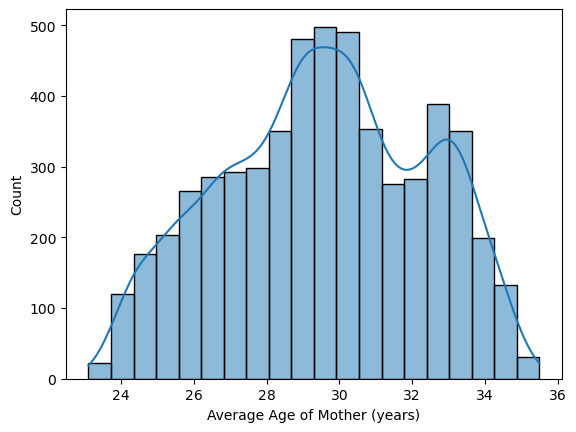

In [16]:
## Extreme value checks
sns.histplot(df_new['Average Age of Mother (years)'], bins=20, kde = True)

<Axes: xlabel='Average Birth Weight (g)', ylabel='Count'>

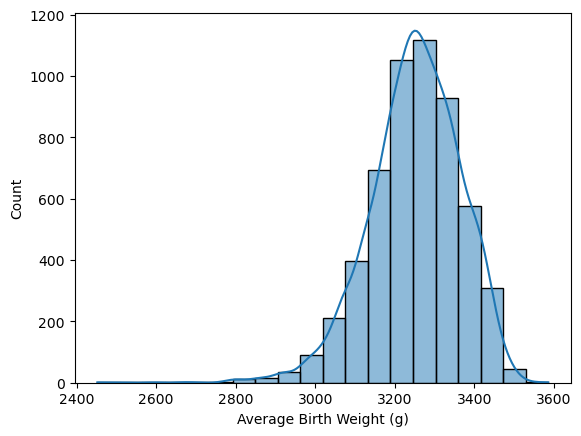

In [17]:
sns.histplot(df_new['Average Birth Weight (g)'], bins=20, kde = True) 

<Axes: xlabel='Number of Births', ylabel='Count'>

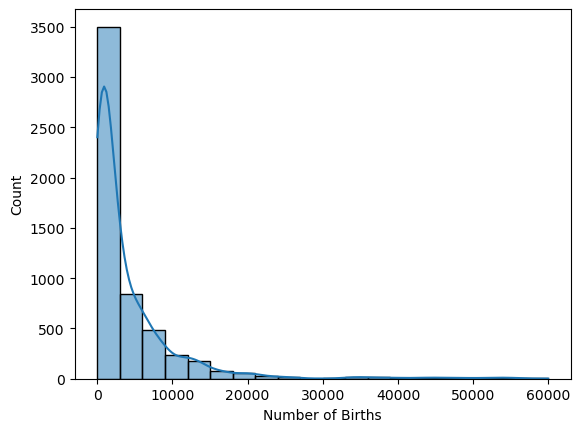

In [18]:
sns.histplot(df_new['Number of Births'], bins=20, kde = True) 

In [19]:
df_new.dtypes

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

# Plotting a choropleth

In [20]:
# Create a data frame with just the states and the values for rating we want plotted\n"
data_to_plot = df_new[['State','Average Age of Mother (years)']]
data_to_plot.head()

,State,Average Age of Mother (years)
0,Alabama,27.8
1,Alabama,24.1
2,Alabama,25.4
3,Alabama,26.7
4,Alabama,28.9


In [21]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

In [22]:
#Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = Country_Geo, 
    data = data_to_plot,
    columns = ['State', 'Average Age of Mother (years)'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Age of Mother (years)").add_to(map)

folium.LayerControl().add_to(map)

In [23]:
map

From the map, It is obvious that there are three states with 'high' average age of Mother as shown by the darkest shades of red. The states are: Montana, Nebraskaand and Vermont. This also answer one of my research existing questions about average age of mother across United states. 

In [24]:
map.save('plot_data.html')